In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

from statistics import mean, stdev
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer

from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import lightgbm as lgb


sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [2]:
# importing necessary libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

In [3]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


In [4]:
# importing necessary libraries
from catboost import CatBoostClassifier

In [6]:
# loading the dataset
df=pd.read_csv('/content/water_potability.csv')

In [7]:
# analyzing data
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [8]:
# number of rows and columns
df.shape

(3276, 10)

In [9]:
# counting the null values of each column
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [10]:
# Info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [11]:
# print the count of unique values for each column in the dataframe 'df'.
for column in df.columns:
    print("{} has {} unique values".format(column, len(df[column].unique())))

ph has 2786 unique values
Hardness has 3276 unique values
Solids has 3276 unique values
Chloramines has 3276 unique values
Sulfate has 2496 unique values
Conductivity has 3276 unique values
Organic_carbon has 3276 unique values
Trihalomethanes has 3115 unique values
Turbidity has 3276 unique values
Potability has 2 unique values


In [12]:
# Using describe function
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


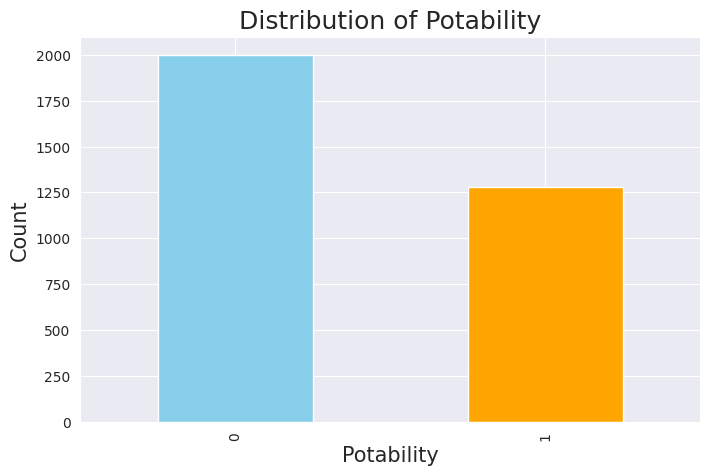

In [13]:
# visualizing the distribution of the 'Potability' variable in the dataset.
pot_lbl = df['Potability'].value_counts()

# Plotting code
plt.figure(figsize=(8, 5))
pot_lbl.plot(kind='bar', color=['skyblue', 'orange'])
plt.xlabel('Potability', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Distribution of Potability', fontsize=18)
plt.show()

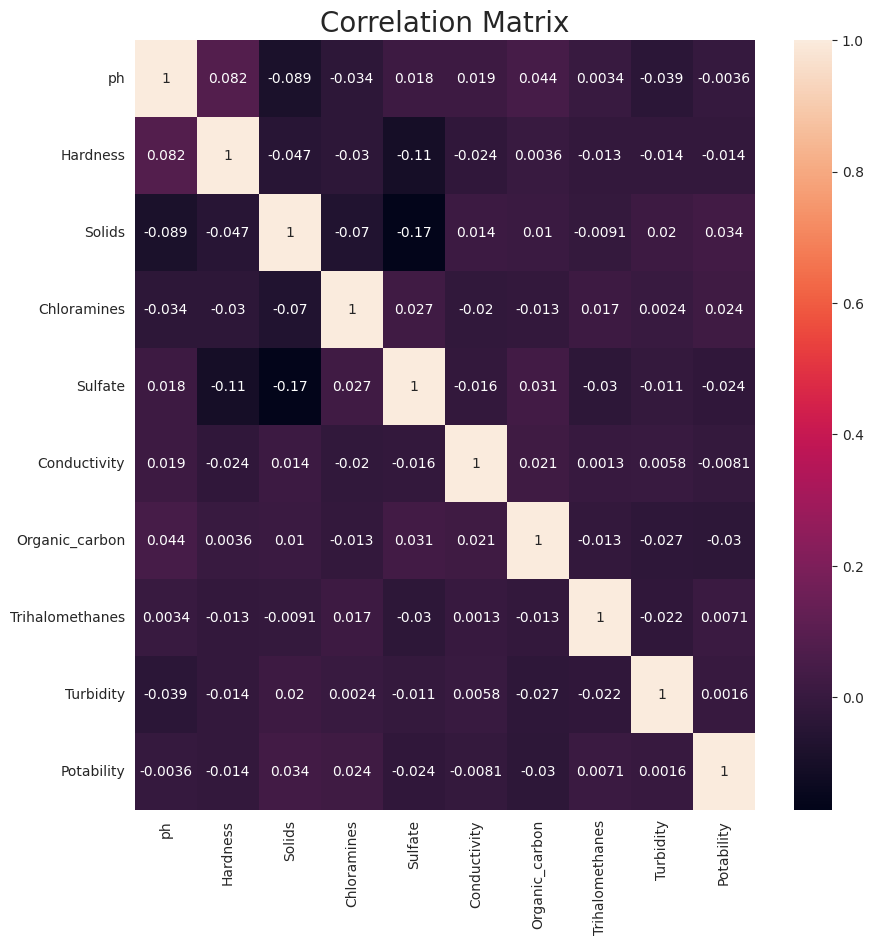

In [14]:
# Heatmap to visualize the correlation matrix of the dataset.
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix', fontsize=20);

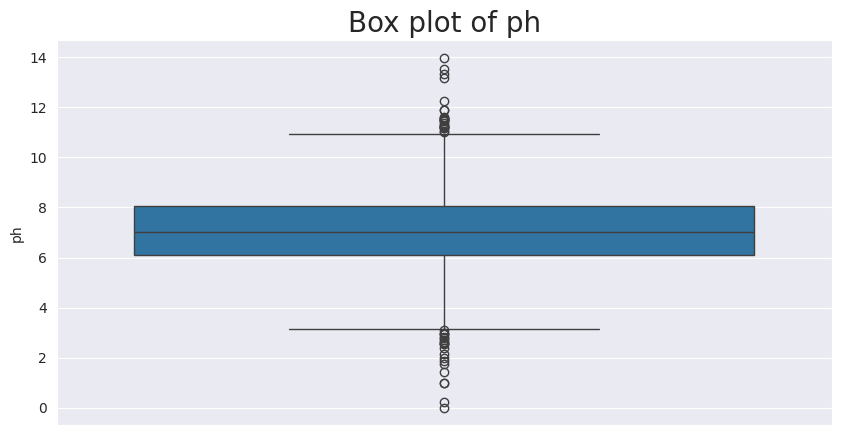

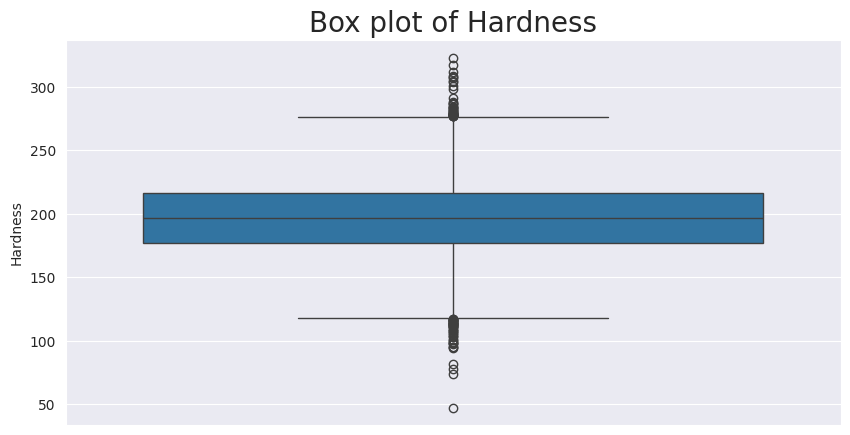

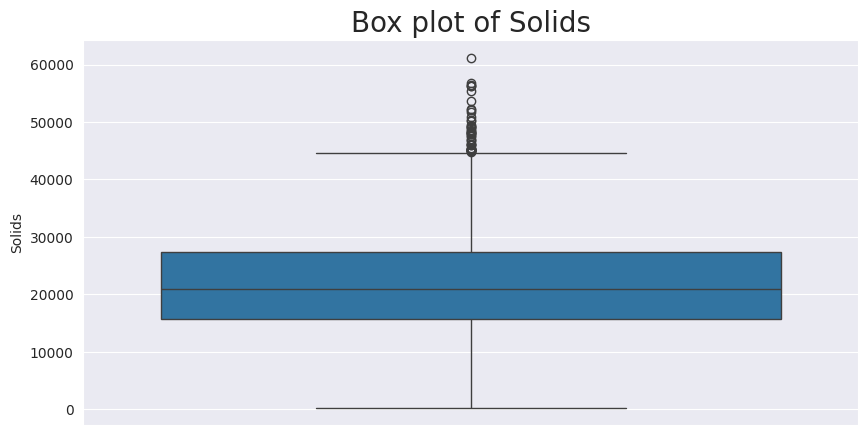

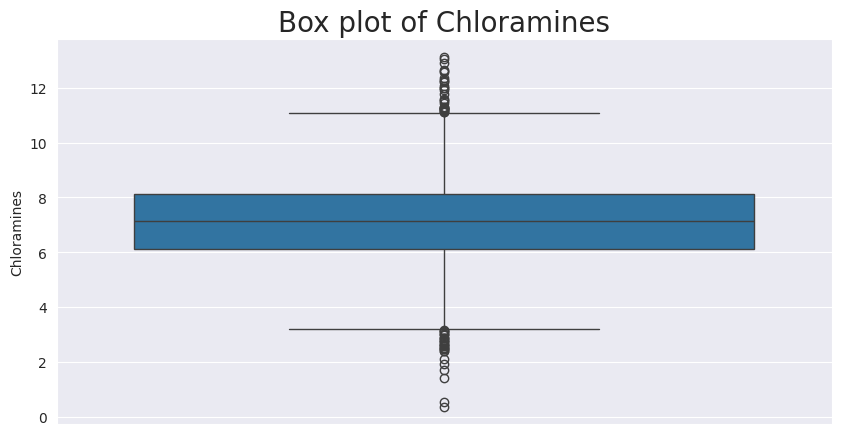

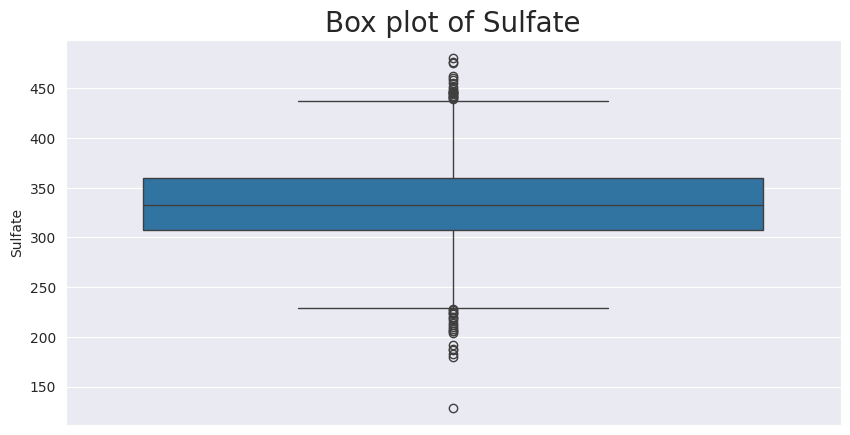

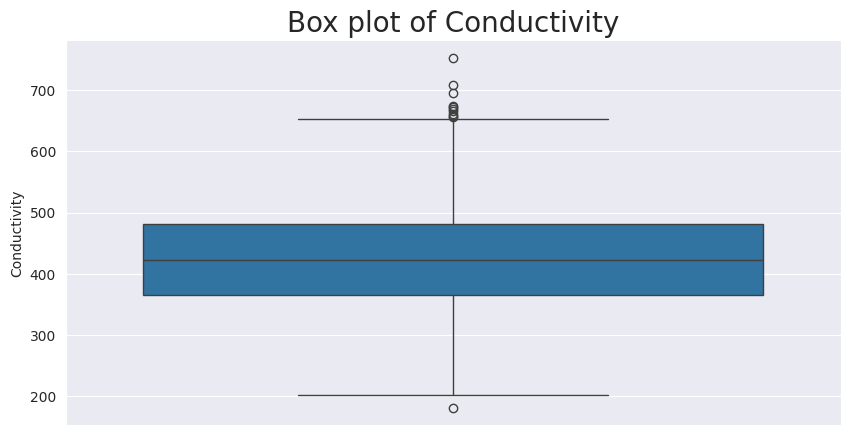

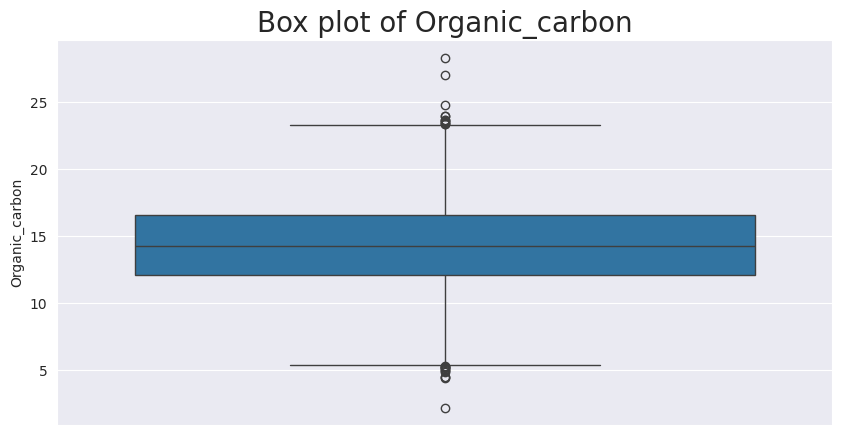

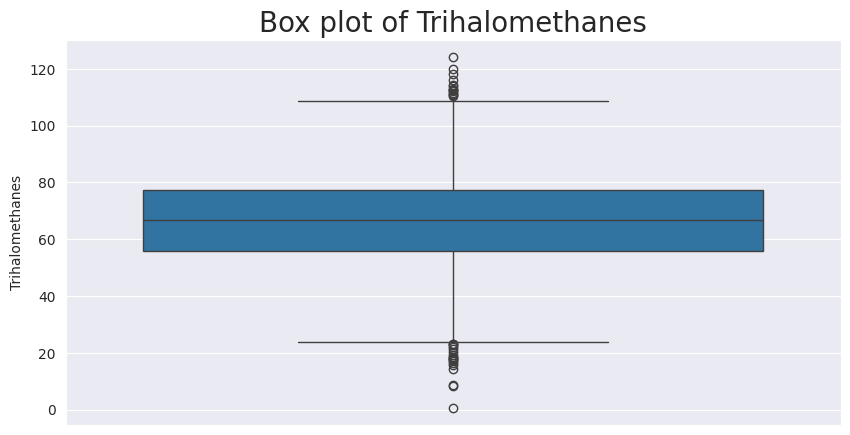

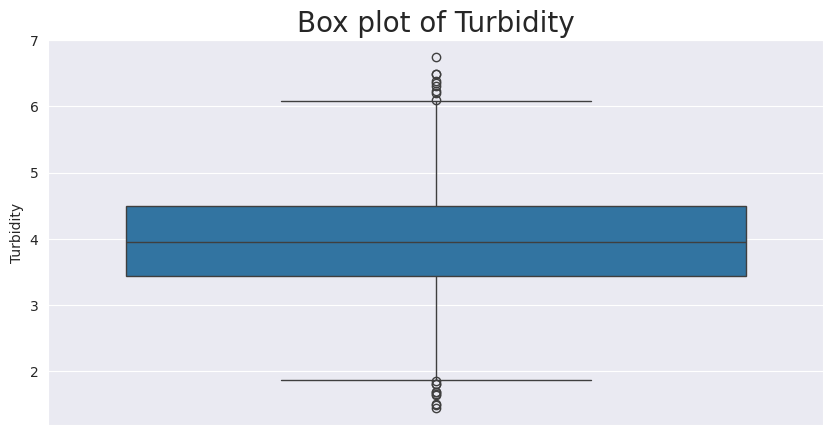

In [15]:
# Generating box plots for each feature in the dataset, except the last column.
for column in df.columns[:-1]:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[column])
    plt.title('Box plot of {}'.format(column), fontsize=20);

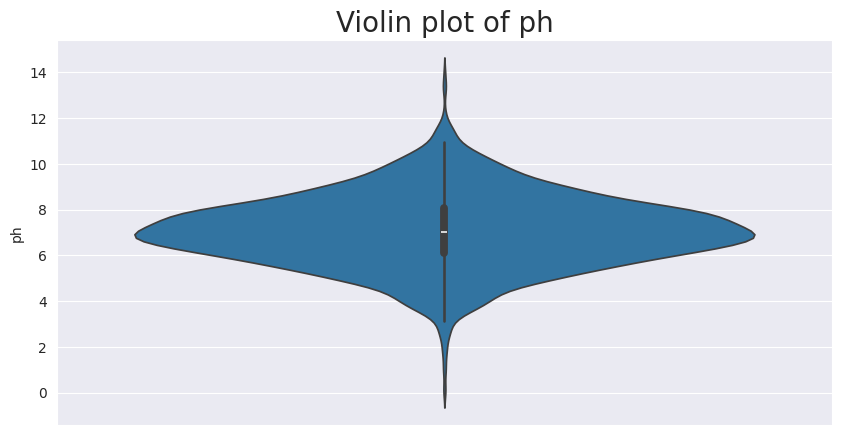

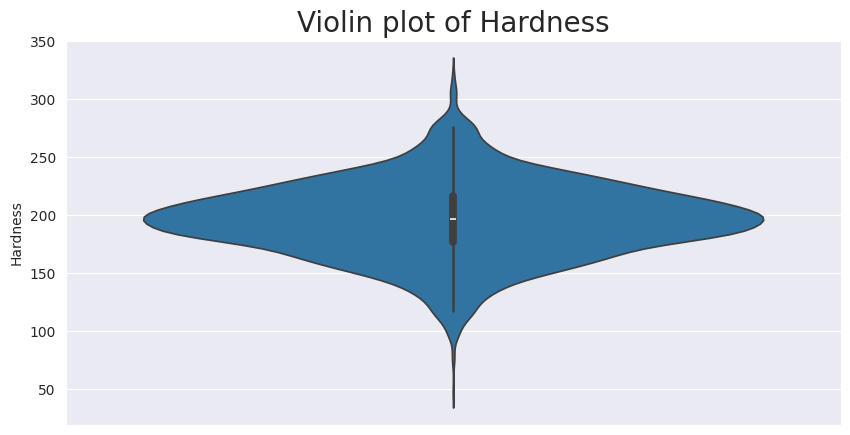

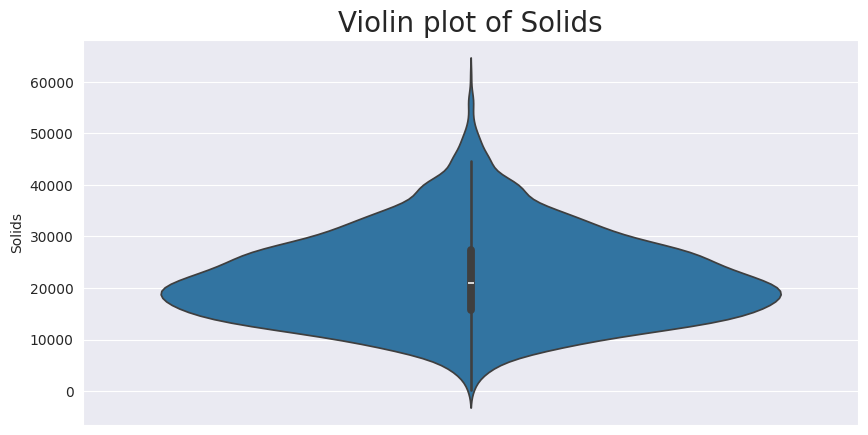

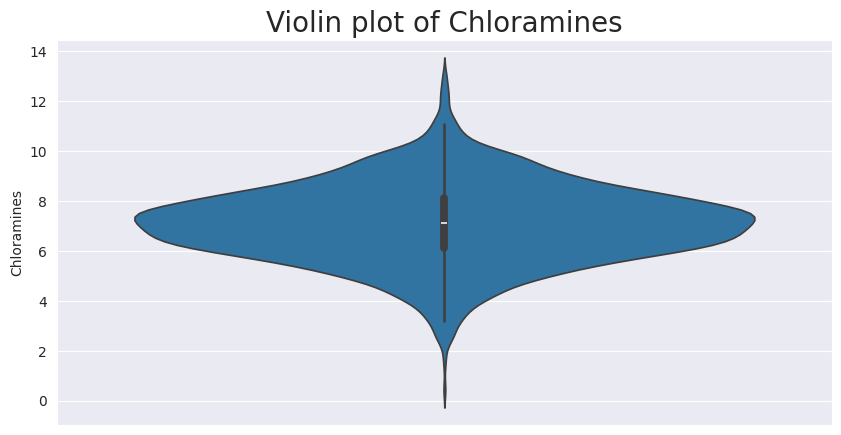

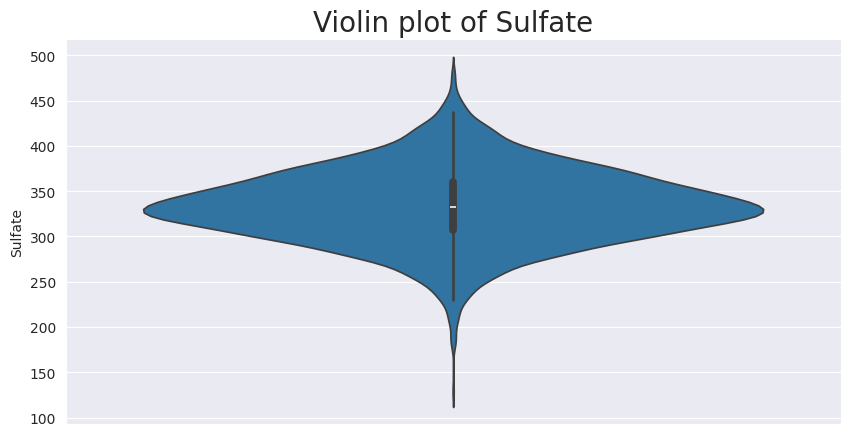

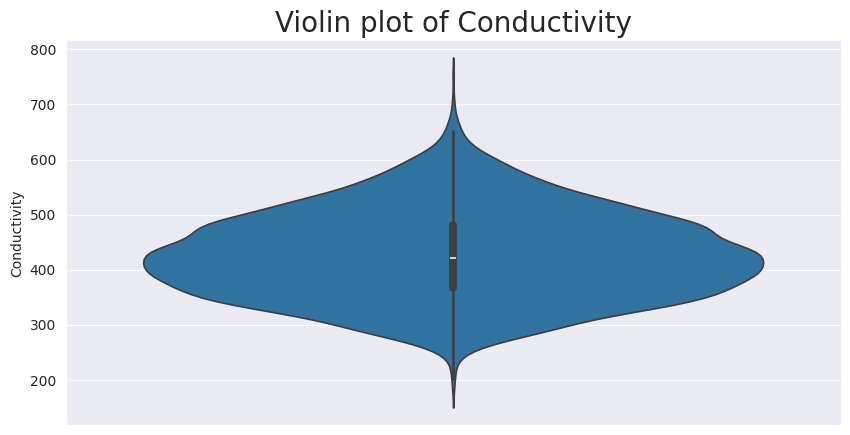

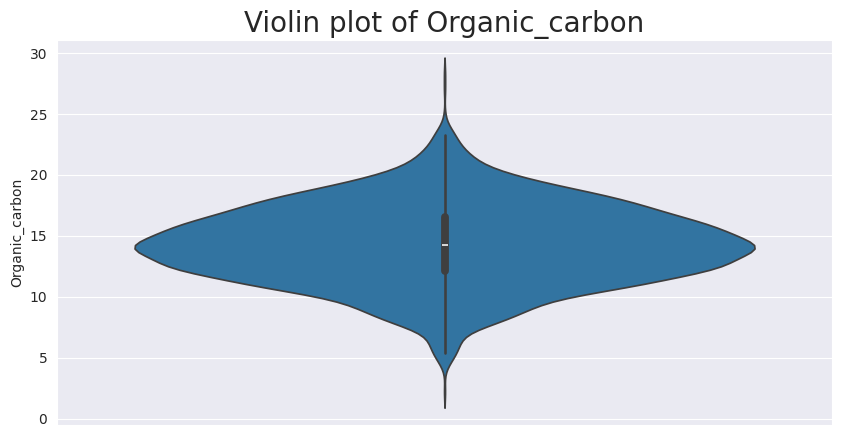

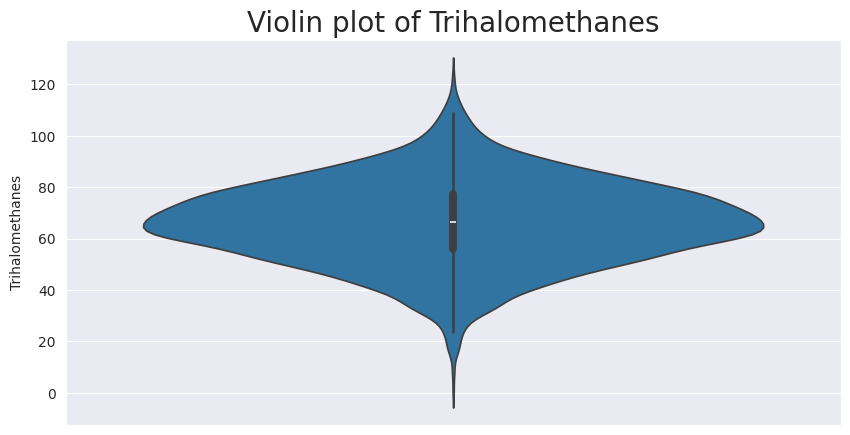

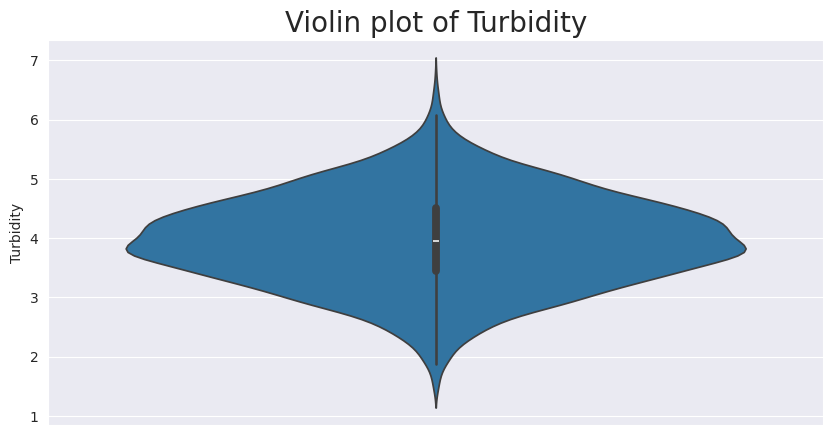

In [16]:
#   Generates violin plots for each feature in the dataset, excluding the last column.
for column in df.columns[:-1]:
    plt.figure(figsize=(10, 5))
    sns.violinplot(df[column])
    plt.title('Violin plot of {}'.format(column), fontsize=20);

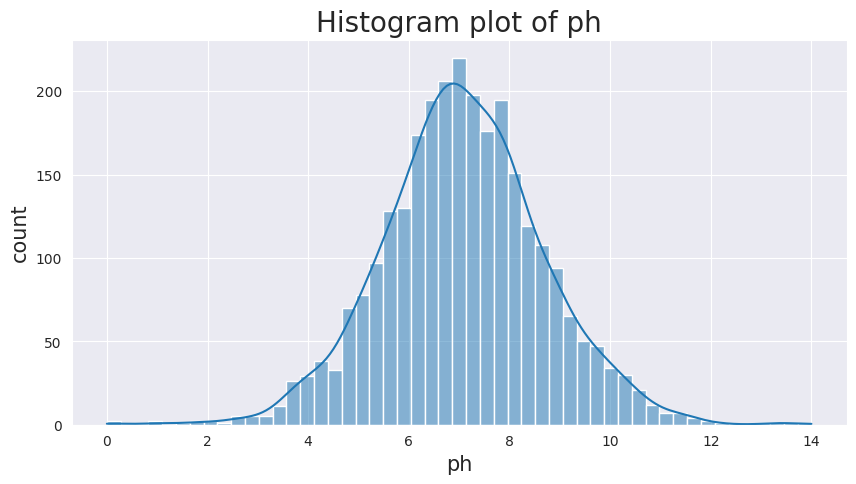

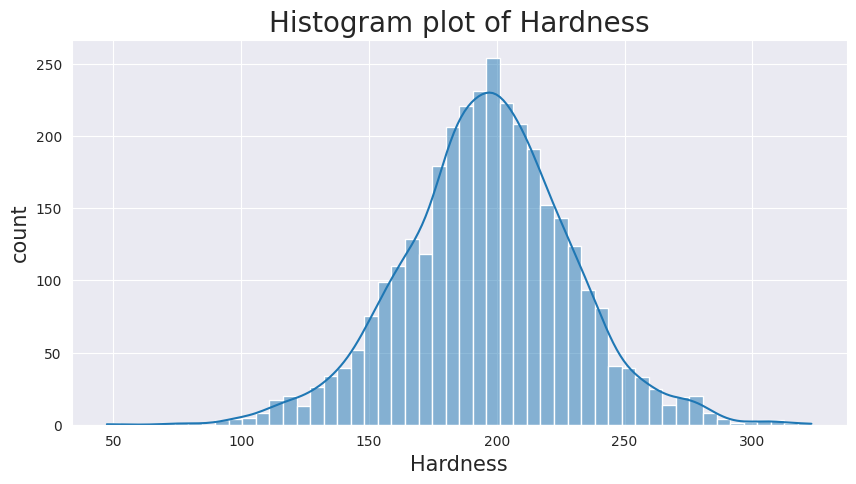

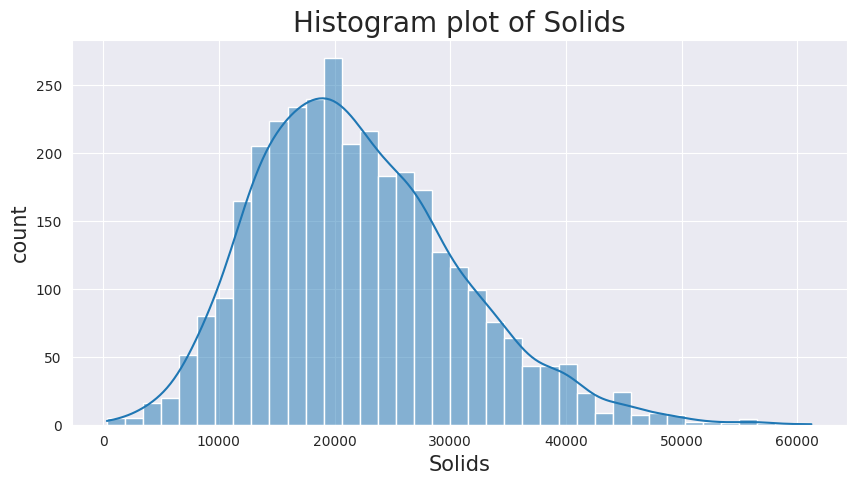

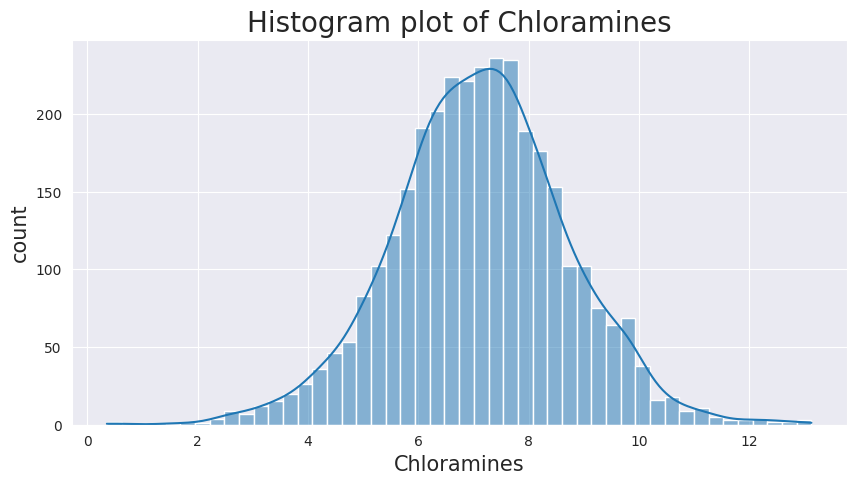

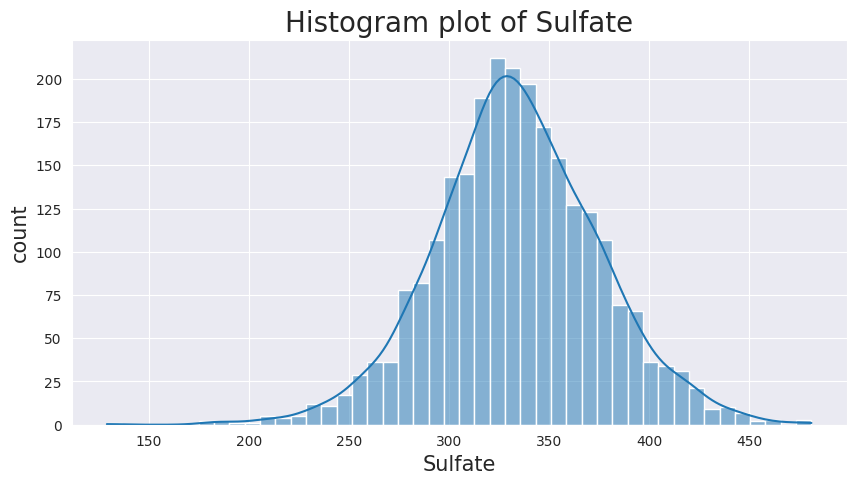

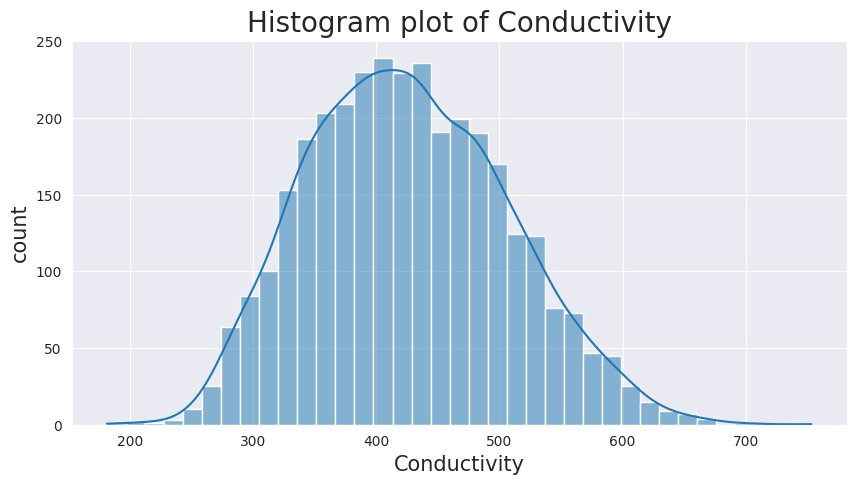

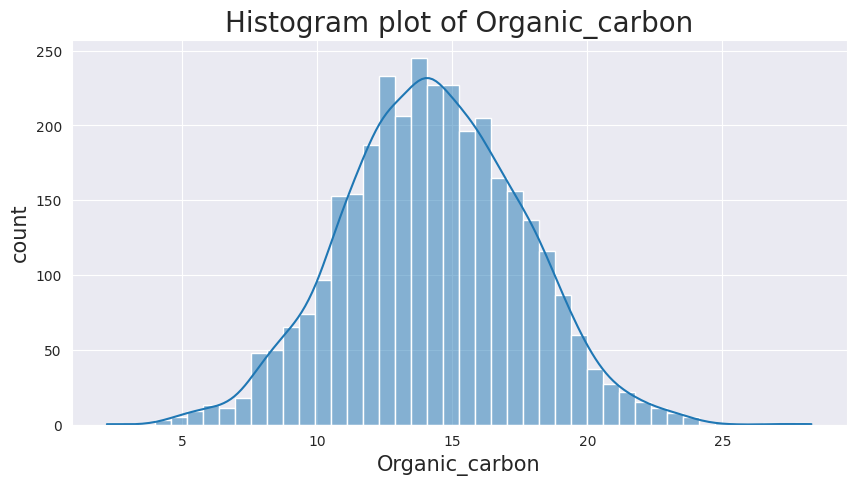

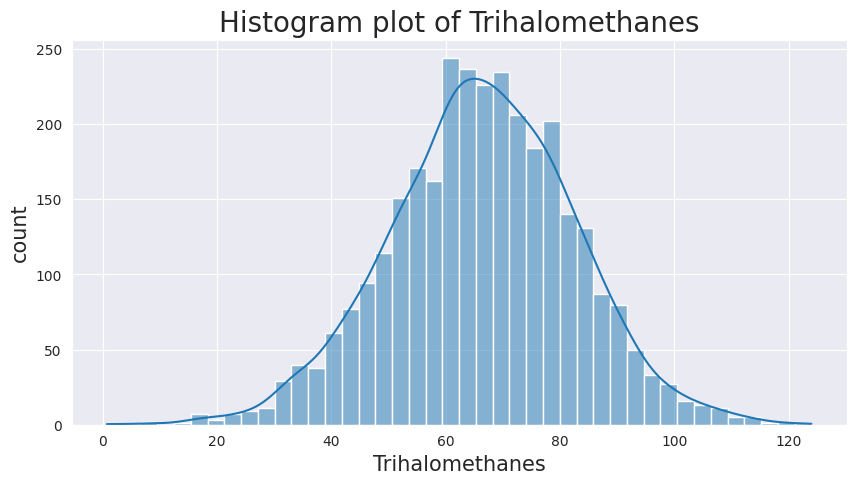

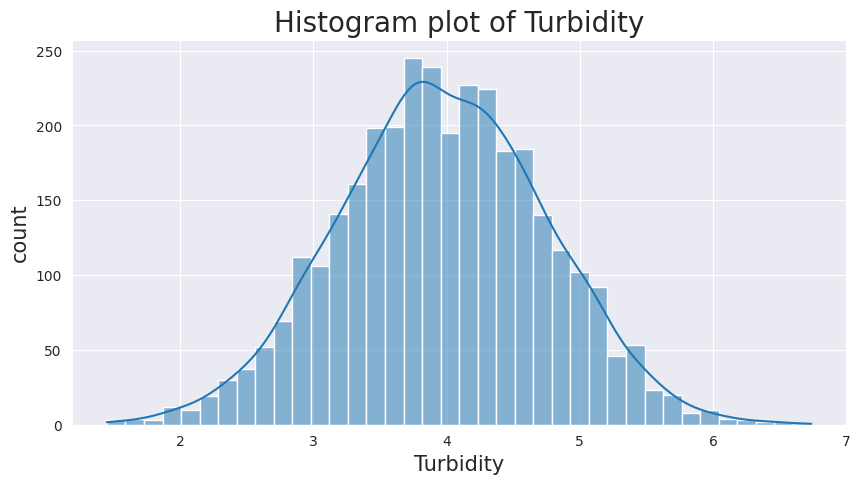

In [17]:
# Generates Histogram plots for each feature in the dataset, excluding the last column.
for column in df.columns[:-1]:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], kde=True)
    plt.xlabel(column, fontsize=15)
    plt.ylabel('count', fontsize=15)
    plt.title('Histogram plot of {}'.format(column), fontsize=20);

In [18]:
# Working on Misising values
ph_median = df[df['Potability'] == 0]['ph'].median(skipna=True)
df.loc[(df['Potability'] == 0) & (df['ph'].isna()), 'ph'] = ph_median

ph_median_1 = df[df['Potability'] == 1]['ph'].median(skipna=True)
df.loc[(df['Potability'] == 1) & (df['ph'].isna()), 'ph'] = ph_median_1

sulf_median = df[df['Potability'] == 0]['Sulfate'].median(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Sulfate'].isna()), 'Sulfate'] = sulf_median

sulf_median_1 = df[df['Potability'] == 1]['Sulfate'].median(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Sulfate'].isna()), 'Sulfate'] = sulf_median_1

traih_median = df[df['Potability'] == 0]['Trihalomethanes'].median(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = traih_median

trah_median_1 = df[df['Potability'] == 1]['Trihalomethanes'].median(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = trah_median_1

The strategy used here is to fill missing values with the median of the respective column, but it's done separately for each category of the 'Potability' variable (0 and 1).This approach helps in maintaining the integrity of the data, assuming that the distribution of values might differ based on whether the water is potable or not.

In [19]:
# Verifying the dataset after the imputation of missing values.
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.035456,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.389426,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.389426,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [20]:
# counting duplicate rows in the dataframe 'df'
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)


number of duplicate rows:  (0, 10)


The output from the duplicate row check indicates that there are zero duplicate rows in the dataset.

In [21]:
# Splitting the dataset into features (X) and the target variable (y).
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [22]:
# Splitting the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
# shapes of the training and test datasets.
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (2293, 9)
X_test shape:  (983, 9)


In [24]:
# Applying Min-Max Scaling to the training and test datasets.
mn = MinMaxScaler()

X_train = mn.fit_transform(X_train)
X_test = mn.transform(X_test)

Min-Max Scaler is a preprocessing technique used to normalize the features in the dataset. It scales each feature to a given range, typically between 0 and 1.This is achieved by subtracting the minimum value of the feature and then dividing by the range of the feature.

In [25]:
# Applying QuantileTransformer Scaling to the training and test datasets.
qt = QuantileTransformer()
X_train = qt.fit_transform(X_train)
X_test = qt.transform(X_test)

In [26]:
# Training the dataset on a variety of machine learning models and evaluating their performance.
models_acc = []

models = [LogisticRegression(), KNeighborsClassifier(),DecisionTreeClassifier(), RandomForestClassifier(n_estimators=128,max_features='log2',random_state=0),
          GaussianNB(), SVC(), XGBClassifier(), lgb.LGBMClassifier(), CatBoostClassifier(), LinearDiscriminantAnalysis(),AdaBoostClassifier() ]

for model in models:

    model.fit(X_train, y_train)

    pred = model.predict(X_test)

    models_acc.append(accuracy_score(y_test, pred))

[LightGBM] [Info] Number of positive: 905, number of negative: 1388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2293, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.394679 -> initscore=-0.427684
[LightGBM] [Info] Start training from score -0.427684
Learning rate set to 0.014683
0:	learn: 0.6877555	total: 52.5ms	remaining: 52.4s
1:	learn: 0.6808280	total: 65.8ms	remaining: 32.9s
2:	learn: 0.6749807	total: 82.4ms	remaining: 27.4s
3:	learn: 0.6696111	total: 95.2ms	remaining: 23.7s
4:	learn: 0.6636729	total: 109ms	remaining: 21.6s
5:	learn: 0.6578980	total: 124ms	remaining: 20.6s
6:	learn: 0.6525900	total: 130ms	remaining: 18.4s
7:	learn: 0.6477963	total: 139ms	remaining: 17.2s
8:	learn: 0.6426004	total: 143ms	remaining: 15.7s
9:	learn: 0.6388193	total: 

In [27]:
res = pd.DataFrame({
    'Model Accuracy': models_acc,
    "Model Name": ['LogisticRegression', 'KNeighborsClassifier','DecisionTreeClassifier', 'RandomForestClassifier', 'GaussianNB', 'SVC','XGBClassifier','LGBMClassifier','CatboostClassifier', 'LinearDiscriminantAnalysis', 'AdaBoost' ]
})

In [28]:
# Printing the accuracy of each model.
res #minmax

,Model Accuracy,Model Name
0,0.623601,LogisticRegression
1,0.630722,KNeighborsClassifier
2,0.734486,DecisionTreeClassifier
3,0.811801,RandomForestClassifier
4,0.629705,GaussianNB
5,0.678535,SVC
6,0.786368,XGBClassifier
7,0.790437,LGBMClassifier
8,0.808749,CatboostClassifier
9,0.625636,LinearDiscriminantAnalysis


In [29]:
# Sorts the models based on their accuracy in descending order.
res.sort_values('Model Accuracy',ascending=False) #quantile transform

,Model Accuracy,Model Name
3,0.811801,RandomForestClassifier
8,0.808749,CatboostClassifier
7,0.790437,LGBMClassifier
6,0.786368,XGBClassifier
10,0.767040,AdaBoost
2,0.734486,DecisionTreeClassifier
5,0.678535,SVC
1,0.630722,KNeighborsClassifier
4,0.629705,GaussianNB
9,0.625636,LinearDiscriminantAnalysis


RandomForestClassifier leads the pack with the highest accuracy of approximately 81.18%, followed closely by CatBoostClassifier at approximately 80.87%.LGBMClassifier, XGBClassifier, and AdaBoost also show respectable accuracies, hovering around 79.04%, 78.94%, and 76.30% respectively.DecisionTreeClassifier, SVC, and KNeighborsClassifier present moderate accuracies ranging from around 73.35% to 67.85%.GaussianNB LinearDiscriminantAnalysis, and LogisticRegression are at the lower end of the spectrum with accuracies close to 62.97%, 62.56%, and 62.36% respectively.RandomForest and CatBoost classifiers emerging as the top contenders.

In [30]:
# Stratified K-Fold cross-validation method
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
lst_accu_stratified = []

In [31]:
X_Scaled = qt.fit_transform(X)

In [32]:
# Initializing various machine learning models.
lr = linear_model.LogisticRegression()
rf = RandomForestClassifier(n_estimators=100,max_features='log2',n_jobs=1,random_state=0)
xgb = XGBClassifier()
cb = CatBoostClassifier()

In [33]:
# Executes the cross-validation process for the Logistic Regression model using Stratified K-Fold.
for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X_Scaled[train_index], X_Scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    lr.fit(X_train_fold, y_train_fold)
    lst_accu_stratified.append(lr.score(X_test_fold, y_test_fold))

In [34]:
# Displays the accuracy metrics of the Logistic Regression model from the cross-validation process.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))


List of possible accuracy: [0.6097560975609756, 0.6128048780487805, 0.6158536585365854, 0.6128048780487805, 0.6128048780487805, 0.6097560975609756, 0.617737003058104, 0.6116207951070336, 0.6146788990825688, 0.6207951070336392]

Maximum Accuracy That can be obtained from this model is: 62.079510703363916 %

Minimum Accuracy: 60.97560975609756 %

Overall Accuracy: 61.38612292086223 %

Standard Deviation is: 0.0034930094195494976


In [35]:
lst_accu_stratified = []

In [36]:
# Executes the cross-validation process for the RandomForestClassifier model using Stratified K-Fold.
for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X_Scaled[train_index], X_Scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    rf.fit(X_train_fold, y_train_fold)
    lst_accu_stratified.append(rf.score(X_test_fold, y_test_fold))

In [37]:
# Displays the accuracy metrics of the RandomForestClassifier model from the cross-validation process.
#rf
#n=100, splits=10 , log2, njob=1, ran_state=0

print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))


List of possible accuracy: [0.8353658536585366, 0.8262195121951219, 0.7865853658536586, 0.8048780487804879, 0.774390243902439, 0.7957317073170732, 0.8012232415902141, 0.8073394495412844, 0.7859327217125383, 0.764525993883792]

Maximum Accuracy That can be obtained from this model is: 83.53658536585365 %

Minimum Accuracy: 76.45259938837921 %

Overall Accuracy: 79.82192138435146 %

Standard Deviation is: 0.021847902005281132


In [38]:
lst_accu_stratified = []

In [39]:
# Executes the cross-validation process for the XGBClassifier model using Stratified K-Fold.
#xgb
for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X_Scaled[train_index], X_Scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    xgb.fit(X_train_fold, y_train_fold)
    lst_accu_stratified.append(xgb.score(X_test_fold, y_test_fold))

In [40]:
# Displays the accuracy metrics of the XGBClassifier model from the cross-validation process.
#xgb
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.7926829268292683, 0.8262195121951219, 0.7804878048780488, 0.7682926829268293, 0.7682926829268293, 0.7469512195121951, 0.8012232415902141, 0.7798165137614679, 0.7828746177370031, 0.7553516819571865]

Maximum Accuracy That can be obtained from this model is: 82.6219512195122 %

Minimum Accuracy: 74.6951219512195 %

Overall Accuracy: 78.02192884314164 %

Standard Deviation is: 0.02292369981301166


In [41]:
lst_accu_stratified = []

In [42]:
# Executes the cross-validation process for the CatBoostClassifier model using Stratified K-Fold.
for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X_Scaled[train_index], X_Scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    cb.fit(X_train_fold, y_train_fold)
    lst_accu_stratified.append(cb.score(X_test_fold, y_test_fold))

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6604184	total: 13.8ms	remaining: 2.75s
5:	learn: 0.6528262	total: 16.4ms	remaining: 2.72s
6:	learn: 0.6466414	total: 19.1ms	remaining: 2.71s
7:	learn: 0.6403610	total: 21.7ms	remaining: 2.7s
8:	learn: 0.6350537	total: 24.4ms	remaining: 2.69s
9:	learn: 0.6299073	total: 27.1ms	remaining: 2.68s
10:	learn: 0.6262259	total: 29.8ms	remaining: 2.68s
11:	learn: 0.6179970	total: 34.7ms	remaining: 2.86s
12:	learn: 0.6141126	total: 39.2ms	remaining: 2.98s
13:	learn: 0.6096849	total: 43ms	remaining: 3.03s
14:	learn: 0.6064437	total: 45.6ms	remaining: 3s
15:	learn: 0.6026639	total: 49.9ms	remaining: 3.07s
16:	learn: 0.5984276	total: 53.6ms	remaining: 3.1s
17:	learn: 0.5954433	total: 56.3ms	remaining: 3.07s
18:	learn: 0.5914564	total: 59ms	remaining: 3.05s
19:	learn: 0.5883810	total: 61.7ms	remaining: 3.02s
20:	learn: 0.5840698	total: 64.4ms	remaining: 3s
21:	learn: 0.5775826	total: 67.2ms	remaining: 2.99s
22:	learn: 0.5748325	total: 69.

In [43]:
# Displays the accuracy metrics of the CatBoostClassifier model from the cross-validation process.
#cb
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [np.float64(0.8414634146341463), np.float64(0.8292682926829268), np.float64(0.7865853658536586), np.float64(0.8048780487804879), np.float64(0.7896341463414634), np.float64(0.7865853658536586), np.float64(0.8318042813455657), np.float64(0.8287461773700305), np.float64(0.7828746177370031), np.float64(0.7828746177370031)]

Maximum Accuracy That can be obtained from this model is: 84.14634146341463 %

Minimum Accuracy: 78.2874617737003 %

Overall Accuracy: 80.64714328335944 %

Standard Deviation is: 0.023740768595719376


In [44]:
lst_accu_stratified = []

In [45]:
# imports necessary classes for ensemble learning techniques.
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier


In [46]:
LogisticRegression(), KNeighborsClassifier(),DecisionTreeClassifier(), RandomForestClassifier(n_estimators=128,max_features='log2',random_state=0),GaussianNB(), SVC(), XGBClassifier(), lgb.LGBMClassifier(), CatBoostClassifier(), LinearDiscriminantAnalysis(),AdaBoostClassifier()

(LogisticRegression(),
 KNeighborsClassifier(),
 DecisionTreeClassifier(),
 RandomForestClassifier(max_features='log2', n_estimators=128, random_state=0),
 GaussianNB(),
 SVC(),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=None,
               n_jobs=None, num_parallel_tree=None, ...),
 LGBMClassifier(),
 LinearDiscriminantAnalysis(),

In [47]:
# creates and trains an ensemble model using the VotingClassifier.
ensemble1 = VotingClassifier(estimators=[('XGBClassifier', XGBClassifier()), ('Random Forest', RandomForestClassifier()),]
                            , voting='hard').fit(X_train,y_train)
print('The accuracy for XGB and Random Forest is:',ensemble1.score(X_test , y_test))

The accuracy for XGB and Random Forest is: 0.8097660223804679


In [48]:
# creates and trains an ensemble model using the StackingClassifier.
ensemble2 = StackingClassifier(estimators=[('XGBClassifier', XGBClassifier() ), ('Random Forest', RandomForestClassifier()),],
                               final_estimator= AdaBoostClassifier()).fit(X_train,y_train)
print('The accuracy for XGB and Random Forest is:',ensemble2.score(X_test , y_test))

The accuracy for XGB and Random Forest is: 0.8087487283825026


In [49]:
# Stratified K-Fold cross-validation for the ensemble model 'ensemble1'.
for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X_Scaled[train_index], X_Scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    ensemble1.fit(X_train_fold, y_train_fold)
    lst_accu_stratified.append(ensemble1.score(X_test_fold, y_test_fold))

In [50]:
# Displays the accuracy metrics for the ensemble model 'ensemble1' after Stratified K-Fold cross-validation.
#ensemble1
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.8140243902439024, 0.8414634146341463, 0.7682926829268293, 0.7865853658536586, 0.7713414634146342, 0.7682926829268293, 0.7951070336391437, 0.8165137614678899, 0.7798165137614679, 0.7737003058103975]

Maximum Accuracy That can be obtained from this model is: 84.14634146341463 %

Minimum Accuracy: 76.82926829268293 %

Overall Accuracy: 79.15137614678899 %

Standard Deviation is: 0.024951954588066223


In [51]:
lst_accu_stratified = []

In [52]:
# Stratified K-Fold cross-validation for the ensemble model 'ensemble2'.
for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X_Scaled[train_index], X_Scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    ensemble2.fit(X_train_fold, y_train_fold)
    lst_accu_stratified.append(ensemble2.score(X_test_fold, y_test_fold))

In [53]:
# Displays the accuracy metrics for the ensemble model 'ensemble2' after Stratified K-Fold cross-validation.
#ensemble2
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.8048780487804879, 0.823170731707317, 0.7621951219512195, 0.7987804878048781, 0.7774390243902439, 0.7865853658536586, 0.8012232415902141, 0.8195718654434251, 0.7798165137614679, 0.7675840978593272]

Maximum Accuracy That can be obtained from this model is: 82.3170731707317 %

Minimum Accuracy: 76.21951219512195 %

Overall Accuracy: 79.21244499142239 %

Standard Deviation is: 0.020824129661688354
